# Synthetic data - Scatter Plot

### Model
* Tensorflow - Linear Regression - 1 layer Model   (17 > 1)

### Train
* X_train (17, 1)
* Y_train (17,)


In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

C:\Users\abido\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Data

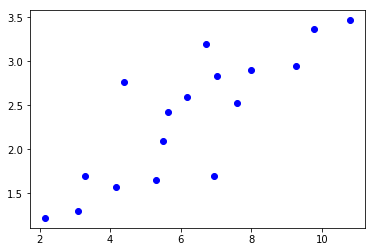

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
plt.plot(train_X, train_Y, 'bo', label='Original data')
n_samples = train_X.shape[0]

### Model

In [4]:
# Parameters 
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(numpy.random.randn(), name="weight")  #shape = single float
b = tf.Variable(numpy.random.randn(), name="bias")

In [6]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [7]:
# Cost- Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2)) / (2*n_samples)

In [8]:
# Optimizing algorithm - Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Epoch: 0050 cost= 0.210633874 W= 0.45398292 b= -0.6688958
Epoch: 0100 cost= 0.195192680 W= 0.44182685 b= -0.5814459
Epoch: 0150 cost= 0.181534827 W= 0.43039393 b= -0.49919847
Epoch: 0200 cost= 0.169454038 W= 0.41964087 b= -0.4218416
Epoch: 0250 cost= 0.158768475 W= 0.40952745 b= -0.3490858
Epoch: 0300 cost= 0.149316952 W= 0.4000153 b= -0.28065678
Epoch: 0350 cost= 0.140957102 W= 0.39106908 b= -0.21629809
Epoch: 0400 cost= 0.133562818 W= 0.38265485 b= -0.15576684
Epoch: 0450 cost= 0.127022579 W= 0.37474105 b= -0.09883556
Epoch: 0500 cost= 0.121237852 W= 0.367298 b= -0.04529036
Epoch: 0550 cost= 0.116121374 W= 0.36029747 b= 0.0050703147
Epoch: 0600 cost= 0.111595958 W= 0.35371345 b= 0.052435864
Epoch: 0650 cost= 0.107593417 W= 0.34752092 b= 0.09698429
Epoch: 0700 cost= 0.104053304 W= 0.34169677 b= 0.13888319
Epoch: 0750 cost= 0.100922257 W= 0.33621892 b= 0.17829023
Epoch: 0800 cost= 0.098153047 W= 0.33106682 b= 0.21535365
Epoch: 0850 cost= 0.095703863 W= 0.3262213 b= 0.25021252
Epoch: 09

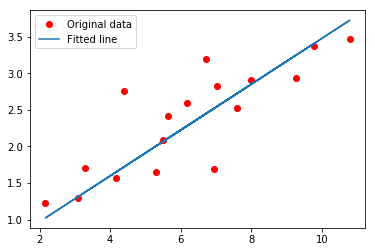

In [9]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()



p = print


# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        # stochastic gradient descent - 1 example at a time
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
